Transformation Tasks
- Identifying and handling duplicated data
- Identifying and handling missing values

In [1]:
import pandas as pd
import numpy as np

In [2]:
# read the data

users_data = pd.read_pickle("../data/users_data_final.pkl")
users_data.head()

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,NaN,NaN,47,blue-collar,married,None,False,True,False,None,92,1,-1,0,None,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,None,single,None,False,False,False,None,198,1,-1,0,None,False,1995-08-01,mobile


In [3]:
# summary of the data

users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

In [4]:
# identify the numerical variable

numerical_var = list(users_data.select_dtypes(['bool', 'float64', 'int64']).columns)
numerical_var

['number_transactions',
 'total_amount_usd',
 'age',
 'default',
 'housing',
 'loan',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit']

In [5]:
# number of numerical variables

print("The number of variables with data type int, float and bool are:"
      , len(numerical_var))

The number of variables with data type int, float and bool are: 11


In [6]:
# identify the variables with data type objects

object_var = list(users_data.select_dtypes(['object']).columns)
object_var

['user_id', 'job', 'marital', 'education', 'contact', 'poutcome', 'device']

In [7]:
# number of variables with data type object

print("The number of variables with data type object are:"
      , len(object_var))

The number of variables with data type object are: 7


In [8]:
# do we have any duplicated rows

users_data.duplicated().sum()

0

In [9]:
# code to subset the dataframe to identify duplicated 

users_data[users_data.duplicated()]

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device


In [10]:
# identifying missing data

users_data.isna().sum()

user_id                    0
number_transactions     9999
total_amount_usd        9999
age                        0
job                      288
marital                    0
education               1857
default                    0
housing                    0
loan                       0
contact                13018
duration                   0
campaign                   0
pdays                      0
previous                   0
poutcome               36957
term_deposit               0
date_joined               30
device                    94
dtype: int64

In [11]:
users_data.isna().mean()

user_id                0.000000
number_transactions    0.221173
total_amount_usd       0.221173
age                    0.000000
job                    0.006370
marital                0.000000
education              0.041076
default                0.000000
housing                0.000000
loan                   0.000000
contact                0.287952
duration               0.000000
campaign               0.000000
pdays                  0.000000
previous               0.000000
poutcome               0.817470
term_deposit           0.000000
date_joined            0.000664
device                 0.002079
dtype: float64

In [12]:
def identify_missing_data(df):
    """
    This function is used to identify missing data
    
    @param df pandas DataFrame
    
    @return a DataFrame with the percentage of missing data for every feature and the data types
    """
    
    percent_missing = df.isnull().mean()
    
    missing_value_df = pd.DataFrame(percent_missing).reset_index() # convert to DataFrame
    missing_value_df = missing_value_df.rename(columns = {"index" : "variable",
                                                                0 : "percent_missing"}) # rename columns

    missing_value_df = missing_value_df.sort_values(by = ['percent_missing'], ascending = False) # sort the values
    
    data_types_df = pd.DataFrame(df.dtypes).reset_index().rename(columns = {"index" : "variable",
                                                                0 : "data_type"}) # rename columns
    
    missing_value_df = missing_value_df.merge(data_types_df, on = "variable") # join the dataframe with datatype
    
    missing_value_df.percent_missing = round(missing_value_df.percent_missing*100, 2) # format the percent_missing
    
    return missing_value_df[missing_value_df.percent_missing > 0]

In [13]:
missing_df = identify_missing_data(users_data)
missing_df

,variable,percent_missing,data_type
0,poutcome,81.75,object
1,contact,28.80,object
2,total_amount_usd,22.12,float64
3,number_transactions,22.12,float64
4,education,4.11,object
5,job,0.64,object
6,device,0.21,object
7,date_joined,0.07,datetime64[ns]


In [16]:
# number of variables with missing data
# count the number of rows of the missing_df

missing_df.shape[0]

8

In [19]:
# identify all variables with missing values

list(missing_df.variable)

['poutcome',
 'contact',
 'total_amount_usd',
 'number_transactions',
 'education',
 'job',
 'device',
 'date_joined']

In [22]:
# identify numerical variables that have missing data

list(missing_df[missing_df.data_type == "float64"].variable)

['total_amount_usd', 'number_transactions']

In [23]:
# number of variables that have missing data

len(list(missing_df[missing_df.data_type == "float64"].variable))

2

In [ ]:
# identify variables that have missing data and data type object

list(missing_df[missing_df.data_type == "??????"].variable)

In [ ]:
# numbers of variables that have missing data and data type object

len(list(missing_df[missing_df.data_type == "??????"].variable))

In [25]:
# numbers of non numerical variables that have missing data 

len(list(missing_df[(missing_df.data_type == "object") | 
                   (missing_df.data_type == "datetime64[ns]")
                   ].variable))

6

In [31]:
# number of variables that have more than 70% missing data

len(list(missing_df[missing_df.percent_missing > 70].variable))

1

In [37]:
# identify columns that have more than 70% missing data

cols_to_drop = list(missing_df[missing_df.percent_missing > 70].variable)
cols_to_drop


['poutcome']

In [54]:
# drop the variables identified in code above

users_data_cleaned = users_data.drop(cols_to_drop, axis = 1)
users_data_cleaned.head()


,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,NaN,NaN,47,blue-collar,married,None,False,True,False,None,92,1,-1,0,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,None,single,None,False,False,False,None,198,1,-1,0,False,1995-08-01,mobile


In [55]:
print(users_data.shape)
print(users_data_cleaned.shape)


(45209, 19)
(45209, 18)


In [56]:
missing_df = identify_missing_data(users_data_cleaned)
missing_df

,variable,percent_missing,data_type
0,contact,28.80,object
1,total_amount_usd,22.12,float64
2,number_transactions,22.12,float64
3,education,4.11,object
4,job,0.64,object
5,device,0.21,object
6,date_joined,0.07,datetime64[ns]


In [47]:
# identify variables with missing data and data type object

list(missing_df[missing_df.data_type == "object"].variable)

['contact', 'education', 'job', 'device']

In [57]:
users_data_cleaned.contact.value_counts(dropna = False)

cellular     29285
NaN          13018
telephone     2906
Name: contact, dtype: int64

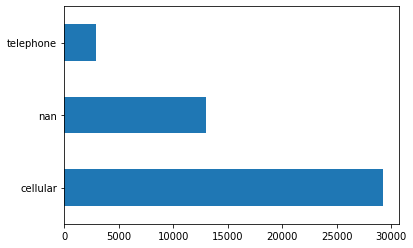

In [58]:
users_data_cleaned.contact.value_counts(dropna = False).plot(kind = "barh");

In [59]:
users_data_cleaned.contact.fillna("other", inplace = True)

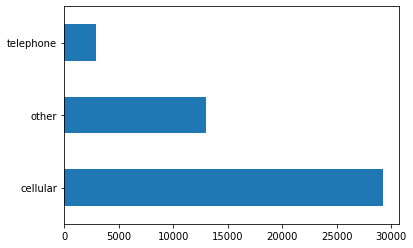

In [60]:
users_data_cleaned.contact.value_counts(dropna = False).plot(kind = "barh");

In [61]:
missing_df = identify_missing_data(users_data_cleaned)
missing_df

,variable,percent_missing,data_type
0,total_amount_usd,22.12,float64
1,number_transactions,22.12,float64
2,education,4.11,object
3,job,0.64,object
4,device,0.21,object
5,date_joined,0.07,datetime64[ns]


In [62]:
# the categories of education, with 1857 missing values

users_data_cleaned.education.value_counts(dropna = False)

secondary    23202
tertiary     13300
primary       6850
NaN           1857
Name: education, dtype: int64

In [63]:
# replace the na with a value of your choice

users_data_cleaned.education.fillna("unknown", inplace = True)

In [64]:
# check the categories of education after you replaced the value

users_data_cleaned.education.value_counts(dropna = False)

secondary    23202
tertiary     13300
primary       6850
unknown       1857
Name: education, dtype: int64

In [65]:
# what missing data do you have left?

missing_df = identify_missing_data(users_data_cleaned)
missing_df

,variable,percent_missing,data_type
0,total_amount_usd,22.12,float64
1,number_transactions,22.12,float64
2,job,0.64,object
3,device,0.21,object
4,date_joined,0.07,datetime64[ns]


In [70]:
# identify variables with missing data and data type object

var_w_dt_object = list(missing_df[missing_df.data_type == "object"].variable)
var_w_dt_object

['job', 'device']

In [72]:
for var in var_w_dt_object:
    print(var)
    users_data_cleaned[var].fillna("unknown", inplace = True)

job
device


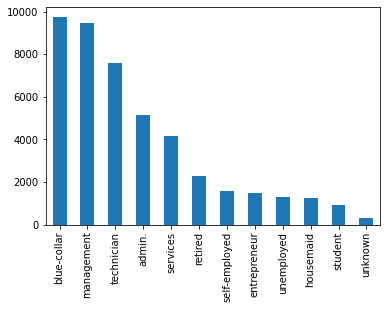

In [75]:
users_data_cleaned.job.value_counts().plot(kind = 'bar');

In [73]:
missing_df = identify_missing_data(users_data_cleaned)
missing_df

,variable,percent_missing,data_type
0,total_amount_usd,22.12,float64
1,number_transactions,22.12,float64
2,date_joined,0.07,datetime64[ns]


In [76]:
# identify all the variables that have missing data and data type float64

var_w_dt_float = list(missing_df[missing_df.data_type == "float64"].variable)
var_w_dt_float

['total_amount_usd', 'number_transactions']

In [78]:
for var in var_w_dt_float:
    print(var)
    users_data_cleaned[var].fillna(0, inplace = True)

total_amount_usd
number_transactions


In [79]:
missing_df = identify_missing_data(users_data_cleaned)
missing_df

,variable,percent_missing,data_type
0,date_joined,0.07,datetime64[ns]


In [81]:
users_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  45209 non-null  float64       
 2   total_amount_usd     45209 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  45209 non-null  object        
 5   marital              45209 non-null  object        
 6   education            45209 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              45209 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

In [82]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-